In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
spam_messages = df[df["Category"]=="spam"]
spam_messages.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [5]:
spam_messages.describe()

,Category,Message
count,747,747
unique,1,641
top,spam,Please call our customer service representativ...
freq,747,4


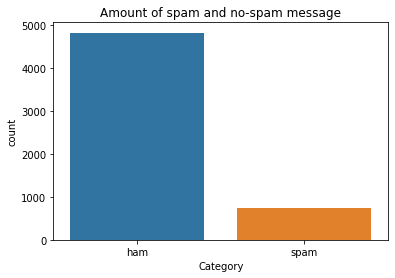

In [6]:
sns.countplot(data = df, x = df["Category"]).set_title("Amount of spam and no-spam message")
plt.show()

In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
len(df)

5572

In [9]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
ham = df[df['Category']== 'ham']
ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [11]:
spam = df[df['Category']=='spam']
spam.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [12]:
ham.shape, spam.shape

((4825, 2), (747, 2))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape, spam.shape

((747, 2), (747, 2))

In [15]:
data = ham.append(spam, ignore_index=True)
data.tail()

,Category,Message
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1493,spam,This is the 2nd time we have tried 2 contact u...


In [16]:
len(df)

5572

In [17]:
data = ham.append(spam, ignore_index=True)
data.tail()

,Category,Message
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1493,spam,This is the 2nd time we have tried 2 contact u...


In [18]:
data['length']=data.Message.str.len()

In [19]:
data['punct']=data.Message.str.len()

In [20]:
data.head()

,Category,Message,length,punct
0,ham,You tell what happen dont behave like this to ...,67,67
1,ham,Just taste fish curry :-P,25,25
2,ham,Call him and say you not coming today ok and t...,82,82
3,ham,Ummma.will call after check in.our life will b...,84,84
4,ham,Great. Hope you are using your connections fro...,122,122


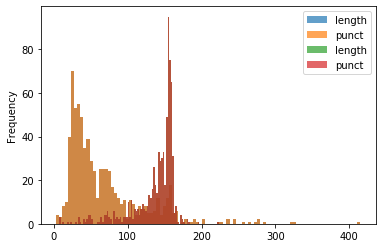

In [21]:
ax = data[data.Category =='ham'].plot(kind='hist',bins=100,alpha=.7)
data[data.Category=='spam'].plot(kind='hist',bins=100,alpha=.7,ax=ax)


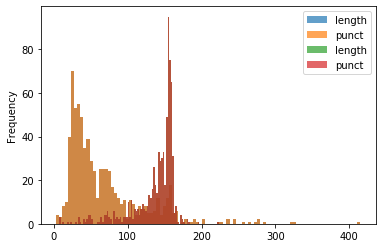

In [22]:
ax = data[data.Category =='ham'].plot(kind='hist',bins=100,alpha=.7)
data[data.Category=='spam'].plot(kind='hist',bins=100,alpha=.7,ax=ax)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
data.head()

,Category,Message,length,punct
0,ham,You tell what happen dont behave like this to ...,67,67
1,ham,Just taste fish curry :-P,25,25
2,ham,Call him and say you not coming today ok and t...,82,82
3,ham,Ummma.will call after check in.our life will b...,84,84
4,ham,Great. Hope you are using your connections fro...,122,122


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['Category'])

In [27]:
## Bag of words creation

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [28]:
X_train_vect.shape

(1045, 3609)

In [29]:
X_train_vect

<1045x3609 sparse matrix of type '<class 'numpy.float64'>'
	with 17403 stored elements in Compressed Sparse Row format>

In [30]:
1045*3708

3874860

In [31]:
# pipeline Random Forest
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [32]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [33]:
y_pred = clf.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 29, 195]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       1.00      0.87      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [36]:
accuracy_score(y_test, y_pred)

0.9354120267260579

In [37]:
clf.predict(["hey, whatssup?"])

array(['ham'], dtype=object)

In [38]:
clf.predict(["you have won tickets to the USA this vacation."])

array(['ham'], dtype=object)

In [39]:
# SVM
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [40]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [41]:
y_pred = clf.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 19, 205]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         ham       0.92      1.00      0.96       225
        spam       1.00      0.92      0.95       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [44]:
accuracy_score(y_test, y_pred)

0.955456570155902

In [45]:
clf.predict(["hey, guys"])

array(['ham'], dtype=object)

In [46]:
clf.predict(["Winner! you win 25000rs. lucky draw"])

array(['spam'], dtype=object)

In [1]:
from model_helper import save,load

In [48]:
save(clf)

True

In [2]:
clf = load()

In [5]:
clf.predict(["wow"])

array(['ham'], dtype=object)